In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression
import sklearn 
import scipy
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

In [2]:
os.chdir("/content/drive/MyDrive/Winter_Research")

In [ ]:
KS = (32, 6279, 11, 3) 
MT = (29, 6554, 11, 3) 
TX = (34, 6524, 11, 3) 
OH =(19, 5712, 11, 3)
CA = (43, 6569, 11, 3) 

In [ ]:
# New Cloud Data
# CA -- 43 images, 72264 pixels, save shape (43, 6569, 11, 3)
# KS -- 32 images, 69071 pixels, save shape (32, 6279, 11, 3)
# MT -- 23 images, 72099 pixels, save shape (23, 6554, 11, 3)
# TX -- 32 images, 71764 pixels, save shape (32, 6524, 11, 3)
# OH -- 12 images, 62827 pixels, save shape (12, 5711, 11, 3)

In [ ]:
loadedArr = np.loadtxt("Rois/Roi_2/Cloud_Mask_v2.csv", delimiter=',')
reshape = loadedArr.reshape(32, -1, 5)

In [ ]:
reshape.shape

(43, 72264, 5)

In [ ]:
imgs = []

In [ ]:
pix_width = 11
plot = False
name = ""
save = False
for i in tqdm(range(reshape.shape[0])): 
  print(i) 
  first_pic = reshape[i]
  row_num = first_pic.shape[0] // pix_width
  first_pic = first_pic[:pix_width*row_num]
  lat = first_pic[:, 4]
  lon = first_pic[:, 3]
  coords = np.hstack([lon[:, np.newaxis], lat[:, np.newaxis]])
  x_cent, y_cent, fit = fit_and_splice(lon, lat)
  if plot:
    print(lat.shape)
    new_x = np.array(lon).reshape(-1,1)
    new_y = np.array(lat)
    plt.scatter(lon, lat)
    plt.xlabel("Longitude Coord")
    plt.ylabel("LatitudeCoord")
    #plt.scatter(new_x, new_y)
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = fit.intercept_ + fit.coef_ * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.savefig("Road_Fit.png")
    plt.show()
    if save:
      plt.savefig(name)
    break
  new_img = splice(first_pic, coords, x_cent, y_cent, pix_width)
  new_sorted_img = sort_arr(new_img, fit)
  #new_img_rgb = (255*((new_sorted_img - 100)/3500)).astype('uint8')
  # plt.scatter(lat, lon)
  # plt.show()
  imgs.append(new_sorted_img)


  0%|          | 0/32 [00:00<?, ?it/s]

0


  3%|▎         | 1/32 [02:58<1:32:13, 178.50s/it]

1


  6%|▋         | 2/32 [05:59<1:29:38, 179.28s/it]

2


  9%|▉         | 3/32 [08:57<1:26:26, 178.83s/it]

3


 12%|█▎        | 4/32 [11:56<1:23:33, 179.06s/it]

4


 16%|█▌        | 5/32 [14:52<1:20:03, 177.91s/it]

5


 19%|█▉        | 6/32 [17:47<1:16:47, 177.21s/it]

6


 22%|██▏       | 7/32 [20:43<1:13:42, 176.88s/it]

7


 25%|██▌       | 8/32 [23:41<1:10:48, 177.02s/it]

8


 28%|██▊       | 9/32 [26:37<1:07:46, 176.82s/it]

9


 31%|███▏      | 10/32 [29:34<1:04:47, 176.70s/it]

10


 34%|███▍      | 11/32 [32:31<1:01:57, 177.01s/it]

11


 38%|███▊      | 12/32 [35:30<59:12, 177.61s/it]  

12


 41%|████      | 13/32 [38:29<56:21, 177.98s/it]

13


 44%|████▍     | 14/32 [41:28<53:30, 178.37s/it]

14


 47%|████▋     | 15/32 [44:28<50:36, 178.61s/it]

15


 50%|█████     | 16/32 [47:26<47:38, 178.67s/it]

16


 53%|█████▎    | 17/32 [50:24<44:34, 178.28s/it]

17


 56%|█████▋    | 18/32 [53:19<41:21, 177.29s/it]

18


 59%|█████▉    | 19/32 [56:14<38:18, 176.81s/it]

19


 62%|██████▎   | 20/32 [59:10<35:16, 176.37s/it]

20


 66%|██████▌   | 21/32 [1:02:04<32:11, 175.59s/it]

21


 69%|██████▉   | 22/32 [1:04:59<29:14, 175.41s/it]

22


 72%|███████▏  | 23/32 [1:07:53<26:16, 175.13s/it]

23


 75%|███████▌  | 24/32 [1:10:47<23:18, 174.76s/it]

24


 78%|███████▊  | 25/32 [1:13:41<20:21, 174.47s/it]

25


 81%|████████▏ | 26/32 [1:16:34<17:25, 174.17s/it]

26


 84%|████████▍ | 27/32 [1:19:28<14:30, 174.15s/it]

27


 88%|████████▊ | 28/32 [1:22:23<11:36, 174.18s/it]

28


 91%|█████████ | 29/32 [1:25:17<08:42, 174.13s/it]

29


 94%|█████████▍| 30/32 [1:28:11<05:48, 174.31s/it]

30


 97%|█████████▋| 31/32 [1:31:06<02:54, 174.47s/it]

31


100%|██████████| 32/32 [1:34:01<00:00, 176.29s/it]


In [ ]:
len(imgs)

32

In [ ]:
new_np = np.array(imgs)

In [ ]:
new_np.shape

(32, 6279, 11, 3)

In [ ]:
arrReshaped = new_np.reshape(new_np.shape[0]*new_np.shape[1], -1)
np.savetxt("Rois/Roi_2/Straight_images_v2.csv", arrReshaped, delimiter=',')

In [ ]:
np.unique(new_np, axis=0).shape

(43, 6569, 11, 3)

In [3]:
arr = np.loadtxt("Rois/Roi_1/Straight_images_v2.csv", delimiter=',')
compress_back = arr.reshape((43, 6569, 11, 3)) 

In [4]:
compress_3000 = compress_back / 3000

In [ ]:
broken = {"TX" : "MT" : [8, 9, 10], "KS" : [8, 16, 18, 19, 26, 31]}

In [8]:
from PIL import Image
import numpy as np

# data = np.random.random((100,100))

# #Rescale to 0-255 and convert to uint8
# rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8)

# im = Image.fromarray(rescaled)
# im.save('test.png')

In [ ]:
rescaled = (255.0 / compress_back.max() * (compress_back - compress_back.min())).astype(np.uint8)

In [ ]:
os.mkdir("CA_straight")

0
(6569, 11, 3)
0.972


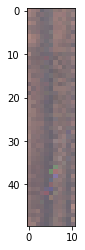

1
(6569, 11, 3)
0.9056666666666667


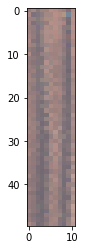

2
(6569, 11, 3)
0.9532222222222222


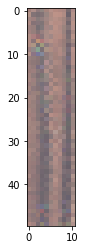

3
(6569, 11, 3)
0.862


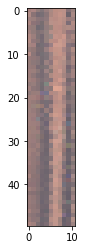

4
(6569, 11, 3)
0.838111111111111


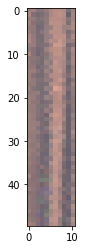

5
(6569, 11, 3)
0.7228888888888889


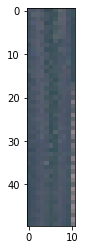

6
(6569, 11, 3)
0.7921111111111111


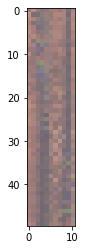

7
(6569, 11, 3)
0.8192222222222222


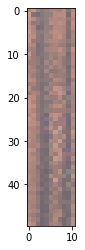

8
(6569, 11, 3)
0.8924444444444445


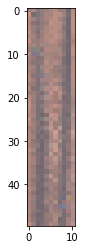

9
(6569, 11, 3)
0.9333333333333335


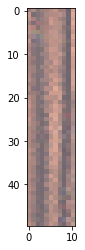

10
(6569, 11, 3)
0.8284444444444444


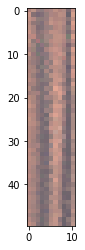

11
(6569, 11, 3)
0.7913333333333333


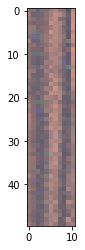

12
(6569, 11, 3)
0.8131111111111111


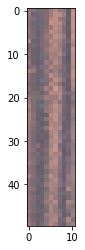

13
(6569, 11, 3)
0.8117777777777778


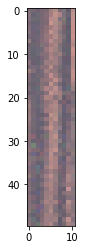

14
(6569, 11, 3)
0.8102222222222223


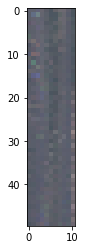

15
(6569, 11, 3)
0.7342222222222222


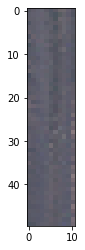

16
(6569, 11, 3)
0.6736666666666667


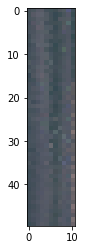

17
(6569, 11, 3)
0.8002222222222223


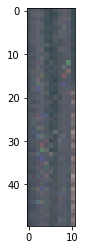

18
(6569, 11, 3)
0.8097777777777777


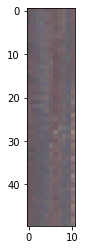

19
(6569, 11, 3)
0.8421111111111111


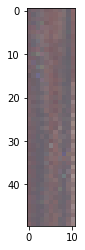

20
(6569, 11, 3)
0.865888888888889


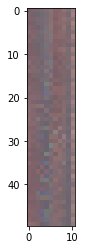

21
(6569, 11, 3)
0.8724444444444445


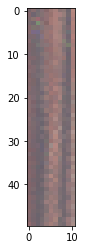

22
(6569, 11, 3)
0.8692222222222222


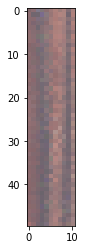

23
(6569, 11, 3)
0.8657777777777778


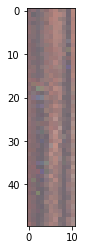

24
(6569, 11, 3)
0.8974444444444444


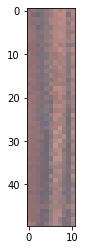

25
(6569, 11, 3)
0.8861111111111111


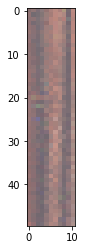

26
(6569, 11, 3)
0.9192222222222223


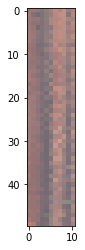

27
(6569, 11, 3)
0.9294444444444445


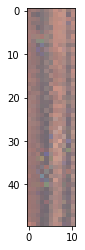

28
(6569, 11, 3)
0.8996666666666666


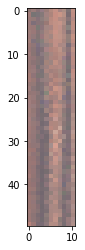

29
(6569, 11, 3)
0.9223333333333334


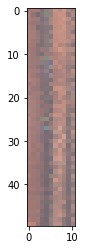

30
(6569, 11, 3)
0.9246666666666666


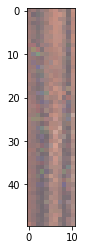

31
(6569, 11, 3)
0.9493333333333333


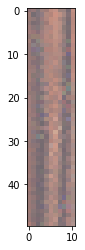

32
(6569, 11, 3)
0.9076666666666666


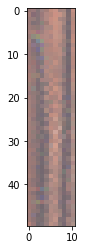

33
(6569, 11, 3)
0.8887777777777778


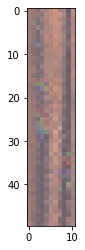

34
(6569, 11, 3)
0.8305555555555556


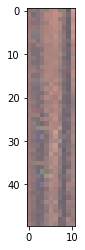

35
(6569, 11, 3)
0.8796666666666667


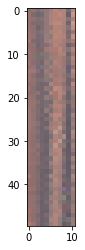

36
(6569, 11, 3)
0.8693333333333332


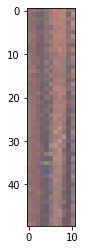

37
(6569, 11, 3)
0.8255555555555555


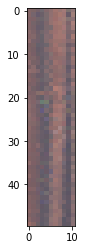

38
(6569, 11, 3)
0.8045555555555555


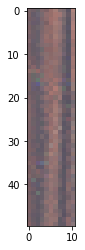

39
(6569, 11, 3)
0.8195555555555555


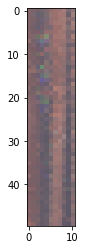

40
(6569, 11, 3)
0.8347777777777777


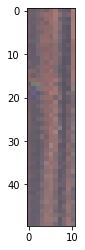

41
(6569, 11, 3)
0.9950000000000001


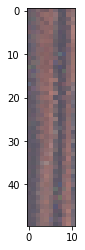

42
(6569, 11, 3)
0.8305555555555554


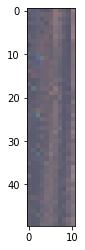

In [9]:
#new_img_rgb = (255*((new_sorted_img - 100)/3500)).astype('uint8')
for i in range(compress_3000.shape[0]):
  print(i)  
  new_img = compress_3000[i]
  print(new_img.shape)
  print(np.max(np.mean(new_img, axis=2)))
  disp = new_img[1000:1050]
  rescaled = (255*disp).astype(np.uint8)
  plt.imshow(rescaled)
  
  im = Image.fromarray(rescaled)
  im.save('CA_straight/cali_img' + str(i) + '.png')
  plt.show()

In [ ]:
new_img_rgb

In [ ]:
def fit_and_splice(lon, lat):  
  new_x = np.array(lon).reshape(-1,1)
  new_y = np.array(lat)
  fit = LinearRegression().fit(new_x, new_y)
  score = fit.score(new_x, new_y)
  # plt.xlabel("Longitude Coord")
  # plt.ylabel("LatitudeCoord")
  # plt.scatter(new_x, new_y)
  # axes = plt.gca()
  # x_vals = np.array(axes.get_xlim())
  # y_vals = fit.intercept_ + fit.coef_ * x_vals
  predictions = fit.predict(new_x)
  splices = [x / row_num for x in range(row_num + 1)]
  buckets = scipy.stats.mstats.mquantiles(predictions, prob=splices)
  y_cent = [(buckets[i] + buckets[i + 1]) / 2 for i in range(len(buckets) - 1)]
  x_cent = (y_cent - fit.intercept_) / fit.coef_
  return x_cent, y_cent, fit
  # print(score)
  # plt.plot(x_vals, y_vals, '--')
  # plt.savefig("Road_Fit.png")
  # plt.show()

In [ ]:
def splice(pic, coords, x_cent, y_cent, pix_width):  
  new_img = np.zeros((x_cent.shape[0], pix_width , 5))
  centers = zip(x_cent, y_cent)
  temp_coords = coords.copy()
  for i in range(pix_width):
    x_plot = []
    y_plot = []  
    for j, (x, y) in enumerate(zip(x_cent, y_cent)):
      cent = np.array((x, y))
      dist = np.linalg.norm(temp_coords - cent, axis=1)
      index = dist.argmin()
      new_img[j][i][:] = pic[index][:]
      temp_coords[index] = [0, 0]
      if temp_coords[index][0] != 0 and temp_coords[index][1] != 0:
        print(index, temp_coords[index])
  return new_img

In [ ]:
def sort_arr(new_img, fit):  
  new_sorted_img = np.zeros((new_img.shape[0], new_img.shape[1], 3))
  score = 0
  scores = []
  for i in range(new_img.shape[0]):
    row = new_img[i]
    new_row = np.zeros((pix_width, 3))
    center = np.array([x_cent[i], y_cent[i]])
    # print(center)
    # break
    lat_lon = np.hstack([row[:,3][:, np.newaxis], row[:,4][:, np.newaxis]]) 
    dist = np.linalg.norm(lat_lon - center, axis=1)
    score += np.sum(dist)
    scores.append(np.sum(dist))
    preds = np.sign(row[:, 3] - fit.coef_ * row[:, 4] + fit.intercept_)
    #print(dist.shape, preds.shape)
    rankings = np.multiply(dist, preds)
    indicies = rankings.argsort()
    new_sorted_img[i] = row[:, 0:3][indicies]
  return new_sorted_img